In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

Fisrt, let's download all data that we need

In [3]:
train_data = pd.read_csv('X_train.csv', index_col='index')
train_data.head()

,acc_now_delinq,addr_state,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,fico_range_high,...,pub_rec,pub_rec_bankruptcies,purpose,revol_util,tax_liens,term,title,total_acc,verification_status,zip_code
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,UT,80000.0,0.0,0.0,0.0,30.49,Oct-1996,4 years,689.0,...,1.0,1.0,credit_card,56.1%,0.0,36 months,Credit card refinancing,26.0,Source Verified,847xx
1,0.0,CA,82000.0,0.0,0.0,0.0,7.00,Mar-1993,10+ years,689.0,...,1.0,1.0,credit_card,88.3%,0.0,36 months,Credit card refinancing,11.0,Not Verified,900xx
2,0.0,NV,46080.0,0.0,0.0,1.0,17.32,Nov-2000,3 years,674.0,...,0.0,0.0,credit_card,18.1%,0.0,36 months,Credit card refinancing,31.0,Source Verified,895xx
3,0.0,AZ,30000.0,0.0,0.0,0.0,7.80,Jan-2010,< 1 year,694.0,...,0.0,0.0,car,33.4%,0.0,36 months,Car financing,24.0,Source Verified,853xx
4,0.0,OH,70000.0,0.0,0.0,0.0,13.36,Jan-2002,< 1 year,674.0,...,0.0,0.0,other,88.6%,0.0,60 months,Other,16.0,Not Verified,453xx


In [4]:
train_data.shape

(1199861, 44)

In [5]:
train_target = pd.read_csv('y_train.csv', index_col='index')
train_target.head()

,loan_status
index,
0,1
1,0
2,1
3,0
4,0


Let's combine train and target just in case (to see how all the features are connected with each other and with target)

In [6]:
train_with_target = train_data.copy()
train_with_target['target'] = train_target.loan_status
train_with_target.head()

,acc_now_delinq,addr_state,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,fico_range_high,...,pub_rec_bankruptcies,purpose,revol_util,tax_liens,term,title,total_acc,verification_status,zip_code,target
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,UT,80000.0,0.0,0.0,0.0,30.49,Oct-1996,4 years,689.0,...,1.0,credit_card,56.1%,0.0,36 months,Credit card refinancing,26.0,Source Verified,847xx,1
1,0.0,CA,82000.0,0.0,0.0,0.0,7.00,Mar-1993,10+ years,689.0,...,1.0,credit_card,88.3%,0.0,36 months,Credit card refinancing,11.0,Not Verified,900xx,0
2,0.0,NV,46080.0,0.0,0.0,1.0,17.32,Nov-2000,3 years,674.0,...,0.0,credit_card,18.1%,0.0,36 months,Credit card refinancing,31.0,Source Verified,895xx,1
3,0.0,AZ,30000.0,0.0,0.0,0.0,7.80,Jan-2010,< 1 year,694.0,...,0.0,car,33.4%,0.0,36 months,Car financing,24.0,Source Verified,853xx,0
4,0.0,OH,70000.0,0.0,0.0,0.0,13.36,Jan-2002,< 1 year,674.0,...,0.0,other,88.6%,0.0,60 months,Other,16.0,Not Verified,453xx,0


### Working with features

Let's see what are all the features and find their meanings in the description

In [7]:
# Get columns with numeric values
numeric_cols = train_with_target.select_dtypes(include=['number']).columns

# Get columns with object (string) values
object_cols = train_with_target.select_dtypes(include=['object']).columns

print("Numeric Columns:", numeric_cols)
print()
print("Object Columns:", object_cols)

Numeric Columns: Index(['acc_now_delinq', 'annual_inc', 'chargeoff_within_12_mths',
       'collections_12_mths_ex_med', 'delinq_2yrs', 'dti', 'fico_range_high',
       'fico_range_low', 'funded_amnt', 'inq_last_12m', 'installment',
       'loan_amnt', 'mort_acc', 'mths_since_last_delinq',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_rev_accts', 'num_sats',
       'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'open_acc', 'open_il_24m', 'open_rv_24m',
       'percent_bc_gt_75', 'pub_rec', 'pub_rec_bankruptcies', 'tax_liens',
       'total_acc', 'target'],
      dtype='object')

Object Columns: Index(['addr_state', 'earliest_cr_line', 'emp_length', 'home_ownership',
       'int_rate', 'issue_d', 'purpose', 'revol_util', 'term', 'title',
       'verification_status', 'zip_code'],
      dtype='object')


Let's see what we have in Title

In [8]:
for i in train_with_target.title.unique():
    print(i)

Credit card refinancing
Car financing
Other
Debt Consolitation
Debt consolidation
Major purchase
debt consolidation
Business
Credit Cards 
Home Improvements
Step towards being debt free
Debt Buster
Wedding payoff
Home improvement
Consolidation-life change
Consolidation Loan
Moving and relocation
Credit Card Debt Consolidation
no postage necessary
nan
Positive Financial Steps 
Lower rate and home improvements!
Siding Project
credit card
Medical expenses
Consolidate
consolidation loan
personal loan
Working capitol for business
CC Payoff
Personal Loan
Debt Free Living
A little extra dough for the wedding
personal consolidation
Vacation
repay
Card Consolidation
Small Expense Consolidation
personal
Refi loan
House Rehab Flip Project
Personal LOan
Credit Card Refi
Home buying
Debt Consolidation
College Grad needs loan to move into first apartment!!!
Personal
Debt Relief- to pay off debt with high% 
Credit Card Consolidation
loAn 1
consolidate debt
Wedding
DebtConsolidationn
Consolidation
Med

I suppose that it's almost the same as category. Let's get rid of this column just because we have all the info in category and we don't want to work with word embeddings yet.

I decided to devide month and year into two different categories (because season and year are totally different values)

In [9]:
#Separate month and year of earliest_cr date

train_with_target['earliest_cr_month'] = train_with_target['earliest_cr_line'].str.split('-').str[0]
train_with_target['earliest_cr_year'] = train_with_target['earliest_cr_line'].str.split('-').str[1].astype(int)  # Convert year to integer

# Drop the original column
train_with_target = train_with_target.drop('earliest_cr_line', axis=1)
train_with_target.head()

,acc_now_delinq,addr_state,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,emp_length,fico_range_high,fico_range_low,...,revol_util,tax_liens,term,title,total_acc,verification_status,zip_code,target,earliest_cr_month,earliest_cr_year
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,UT,80000.0,0.0,0.0,0.0,30.49,4 years,689.0,685.0,...,56.1%,0.0,36 months,Credit card refinancing,26.0,Source Verified,847xx,1,Oct,1996
1,0.0,CA,82000.0,0.0,0.0,0.0,7.00,10+ years,689.0,685.0,...,88.3%,0.0,36 months,Credit card refinancing,11.0,Not Verified,900xx,0,Mar,1993
2,0.0,NV,46080.0,0.0,0.0,1.0,17.32,3 years,674.0,670.0,...,18.1%,0.0,36 months,Credit card refinancing,31.0,Source Verified,895xx,1,Nov,2000
3,0.0,AZ,30000.0,0.0,0.0,0.0,7.80,< 1 year,694.0,690.0,...,33.4%,0.0,36 months,Car financing,24.0,Source Verified,853xx,0,Jan,2010
4,0.0,OH,70000.0,0.0,0.0,0.0,13.36,< 1 year,674.0,670.0,...,88.6%,0.0,60 months,Other,16.0,Not Verified,453xx,0,Jan,2002


In [10]:
#Separate month and year of issue date

train_with_target['issue_d_month'] = train_with_target['issue_d'].str.split('-').str[0]
train_with_target['issue_d_year'] = train_with_target['issue_d'].str.split('-').str[1].astype(int)  # Convert year to integer

# Drop the original column
train_with_target = train_with_target.drop('issue_d', axis=1)
train_with_target.head()

,acc_now_delinq,addr_state,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,emp_length,fico_range_high,fico_range_low,...,term,title,total_acc,verification_status,zip_code,target,earliest_cr_month,earliest_cr_year,issue_d_month,issue_d_year
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,UT,80000.0,0.0,0.0,0.0,30.49,4 years,689.0,685.0,...,36 months,Credit card refinancing,26.0,Source Verified,847xx,1,Oct,1996,Apr,2016
1,0.0,CA,82000.0,0.0,0.0,0.0,7.00,10+ years,689.0,685.0,...,36 months,Credit card refinancing,11.0,Not Verified,900xx,0,Mar,1993,Sep,2017
2,0.0,NV,46080.0,0.0,0.0,1.0,17.32,3 years,674.0,670.0,...,36 months,Credit card refinancing,31.0,Source Verified,895xx,1,Nov,2000,Aug,2016
3,0.0,AZ,30000.0,0.0,0.0,0.0,7.80,< 1 year,694.0,690.0,...,36 months,Car financing,24.0,Source Verified,853xx,0,Jan,2010,Aug,2015
4,0.0,OH,70000.0,0.0,0.0,0.0,13.36,< 1 year,674.0,670.0,...,60 months,Other,16.0,Not Verified,453xx,0,Jan,2002,Sep,2017


Interest rate is more numeric feature than a categorical one, so let's change the data type

In [11]:
# Make interest rate float not a string
train_with_target['int_rate'] = train_with_target['int_rate'].str.replace('%', '').astype(float)
train_with_target.head()

,acc_now_delinq,addr_state,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,emp_length,fico_range_high,fico_range_low,...,term,title,total_acc,verification_status,zip_code,target,earliest_cr_month,earliest_cr_year,issue_d_month,issue_d_year
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,UT,80000.0,0.0,0.0,0.0,30.49,4 years,689.0,685.0,...,36 months,Credit card refinancing,26.0,Source Verified,847xx,1,Oct,1996,Apr,2016
1,0.0,CA,82000.0,0.0,0.0,0.0,7.00,10+ years,689.0,685.0,...,36 months,Credit card refinancing,11.0,Not Verified,900xx,0,Mar,1993,Sep,2017
2,0.0,NV,46080.0,0.0,0.0,1.0,17.32,3 years,674.0,670.0,...,36 months,Credit card refinancing,31.0,Source Verified,895xx,1,Nov,2000,Aug,2016
3,0.0,AZ,30000.0,0.0,0.0,0.0,7.80,< 1 year,694.0,690.0,...,36 months,Car financing,24.0,Source Verified,853xx,0,Jan,2010,Aug,2015
4,0.0,OH,70000.0,0.0,0.0,0.0,13.36,< 1 year,674.0,670.0,...,60 months,Other,16.0,Not Verified,453xx,0,Jan,2002,Sep,2017


Same for revol util

In [12]:
train_with_target['revol_util'] = train_with_target['revol_util'].str.replace('%', '').astype(float)
train_with_target.head()

,acc_now_delinq,addr_state,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,emp_length,fico_range_high,fico_range_low,...,term,title,total_acc,verification_status,zip_code,target,earliest_cr_month,earliest_cr_year,issue_d_month,issue_d_year
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,UT,80000.0,0.0,0.0,0.0,30.49,4 years,689.0,685.0,...,36 months,Credit card refinancing,26.0,Source Verified,847xx,1,Oct,1996,Apr,2016
1,0.0,CA,82000.0,0.0,0.0,0.0,7.00,10+ years,689.0,685.0,...,36 months,Credit card refinancing,11.0,Not Verified,900xx,0,Mar,1993,Sep,2017
2,0.0,NV,46080.0,0.0,0.0,1.0,17.32,3 years,674.0,670.0,...,36 months,Credit card refinancing,31.0,Source Verified,895xx,1,Nov,2000,Aug,2016
3,0.0,AZ,30000.0,0.0,0.0,0.0,7.80,< 1 year,694.0,690.0,...,36 months,Car financing,24.0,Source Verified,853xx,0,Jan,2010,Aug,2015
4,0.0,OH,70000.0,0.0,0.0,0.0,13.36,< 1 year,674.0,670.0,...,60 months,Other,16.0,Not Verified,453xx,0,Jan,2002,Sep,2017


Let's find out how many values available in object type of features and return categorical values with count.

In [13]:
def explore_object_type(df ,feature_name): 
    if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

for feature_name in train_with_target.columns:
    if train_with_target[feature_name].dtype == 'object':
        print('\n"' + str(feature_name) + '\'s" Values with count are :')
        explore_object_type(train_with_target, str(feature_name))


"addr_state's" Values with count are :
addr_state
CA    171589
TX     98740
NY     98339
FL     86422
IL     46874
NJ     43768
PA     40457
OH     39434
GA     39418
NC     33717
VA     33538
MI     31504
AZ     29034
MD     28110
MA     27462
CO     25938
WA     25460
MN     21260
IN     19442
MO     18851
TN     18550
CT     18171
NV     17928
WI     15744
AL     14844
SC     14547
OR     14369
LA     13453
KY     11454
OK     10847
KS      9809
AR      8856
UT      8590
NM      6385
MS      6267
HI      5884
NH      5754
RI      5327
WV      4209
NE      3696
DE      3371
MT      3329
DC      3046
AK      2841
WY      2539
VT      2505
SD      2443
ME      2200
ID      1927
ND      1616
IA         3
Name: count, dtype: int64

"emp_length's" Values with count are :
emp_length
10+ years    396911
2 years      109336
3 years       96813
< 1 year      94486
1 year        79958
5 years       75440
4 years       72998
6 years       55398
8 years       51577
7 years       51168
9 years  

Too many rare zipcodes. Let's remove some of them

In [14]:
# Find zip_codes with count <= 15
zipcodes_to_remove = [zipcode for zipcode in train_with_target['zip_code'].unique() 
                      if len(train_with_target[train_with_target['zip_code'] == zipcode]) <= 15]

# Remove rows with those zip_codes
train_with_target = train_with_target[~train_with_target['zip_code'].isin(zipcodes_to_remove)]

Now let's see if we have any extra features (with high correlation)

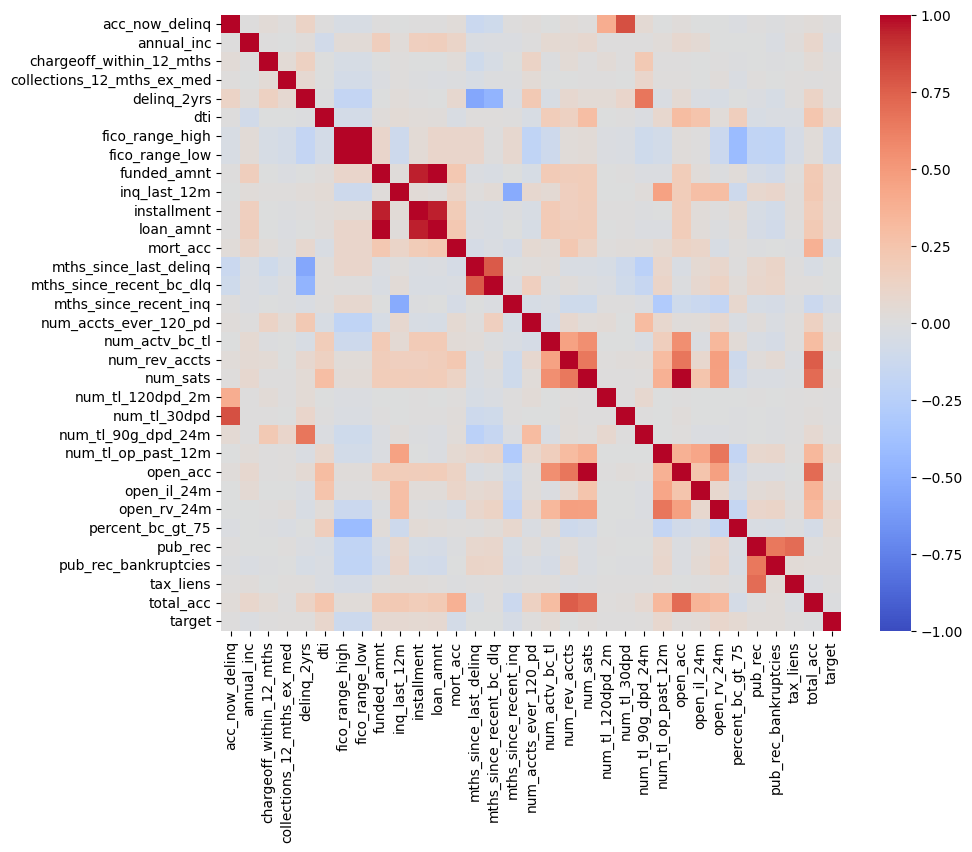

In [15]:
correlation_matrix = train_with_target[numeric_cols].corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()


In [16]:
import numpy as np

# Select upper triangle of correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

In [17]:
to_drop

['fico_range_low', 'installment', 'loan_amnt', 'open_acc']

I would rather keep 'fico range low' than high as a lower line which appears to be more important for a decision.
Let's keep these features and make some more new ones. And after that we'll drop the extra features.

I suppose that the ratio of monthly payment to the income is crutial for our issue. Let's generate this value.

In [18]:
def compute_monthly_payment_rat(row):
    
    monthly_income = row['annual_inc'] / 12

    monthly_payment_rat = row['installment'] / monthly_income

    return monthly_payment_rat

# Apply the function to the dataframe
train_with_target['monthly_payment_rat'] = train_with_target.apply(compute_monthly_payment_rat, axis=1)

Also it would be nice to know how high or low is the salary to a particular state, cause medium income for Texas is a low income for California.

In [19]:
# Calculate the ratio income

train_with_target['ratio_inc'] = train_with_target['annual_inc'] / train_with_target.groupby('addr_state')['annual_inc'].transform('mean')

train_with_target.head()

,acc_now_delinq,addr_state,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,emp_length,fico_range_high,fico_range_low,...,total_acc,verification_status,zip_code,target,earliest_cr_month,earliest_cr_year,issue_d_month,issue_d_year,monthly_payment_rat,ratio_inc
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,UT,80000.0,0.0,0.0,0.0,30.49,4 years,689.0,685.0,...,26.0,Source Verified,847xx,1,Oct,1996,Apr,2016,0.080854,1.058970
1,0.0,CA,82000.0,0.0,0.0,0.0,7.00,10+ years,689.0,685.0,...,11.0,Not Verified,900xx,0,Mar,1993,Sep,2017,0.031357,0.976988
2,0.0,NV,46080.0,0.0,0.0,1.0,17.32,3 years,674.0,670.0,...,31.0,Source Verified,895xx,1,Nov,2000,Aug,2016,0.082802,0.627750
3,0.0,AZ,30000.0,0.0,0.0,0.0,7.80,< 1 year,694.0,690.0,...,24.0,Source Verified,853xx,0,Jan,2010,Aug,2015,0.039592,0.398181
4,0.0,OH,70000.0,0.0,0.0,0.0,13.36,< 1 year,674.0,670.0,...,16.0,Not Verified,453xx,0,Jan,2002,Sep,2017,0.103263,1.010799


I assume that dti lower than the mean one can also be an important feature.

In [20]:
train_with_target['dti_higher_than_mean'] = (train_with_target['dti'] > train_with_target.groupby('zip_code')['dti'].transform('mean')).astype(int)

Some states can have higher default status than the others. Let's keep this info in our dataframe.

In [21]:
# Calculate the ratio for each state in the training data
state_default_ratio = train_with_target.groupby('addr_state').apply(lambda x: x['target'].sum() / len(x)).to_dict()

# Map the ratio to a new column
train_with_target['percentage_of_default_in_state'] = train_with_target['addr_state'].map(state_default_ratio)

Change a little bit the columns to drop (ones with high correlation)

In [22]:
to_drop = ['fico_range_high', 'installment', 'loan_amnt', 'open_acc', 'title']

In [23]:
# Drop features 
train_with_target.drop(to_drop, axis=1, inplace=True)
train_with_target.head()

,acc_now_delinq,addr_state,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,emp_length,fico_range_low,funded_amnt,...,zip_code,target,earliest_cr_month,earliest_cr_year,issue_d_month,issue_d_year,monthly_payment_rat,ratio_inc,dti_higher_than_mean,percentage_of_default_in_state
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,UT,80000.0,0.0,0.0,0.0,30.49,4 years,685.0,16000.0,...,847xx,1,Oct,1996,Apr,2016,0.080854,1.058970,1,0.165366
1,0.0,CA,82000.0,0.0,0.0,0.0,7.00,10+ years,685.0,6600.0,...,900xx,0,Mar,1993,Sep,2017,0.031357,0.976988,0,0.192984
2,0.0,NV,46080.0,0.0,0.0,1.0,17.32,3 years,670.0,10000.0,...,895xx,1,Nov,2000,Aug,2016,0.082802,0.627750,0,0.210758
3,0.0,AZ,30000.0,0.0,0.0,0.0,7.80,< 1 year,690.0,3000.0,...,853xx,0,Jan,2010,Aug,2015,0.039592,0.398181,0,0.187847
4,0.0,OH,70000.0,0.0,0.0,0.0,13.36,< 1 year,670.0,20000.0,...,453xx,0,Jan,2002,Sep,2017,0.103263,1.010799,0,0.190272


Also we need to know if we have any NaN values

In [24]:
train_with_target.isna().sum()

acc_now_delinq                         0
addr_state                             0
annual_inc                             0
chargeoff_within_12_mths              37
collections_12_mths_ex_med            37
delinq_2yrs                            0
dti                                    0
emp_length                         71739
fico_range_low                         0
funded_amnt                            0
home_ownership                         0
inq_last_12m                      567142
int_rate                               0
mort_acc                           31532
mths_since_last_delinq            607359
mths_since_recent_bc_dlq          917066
mths_since_recent_inq             149749
num_accts_ever_120_pd              44999
num_actv_bc_tl                     44999
num_rev_accts                      45000
num_sats                           37285
num_tl_120dpd_2m                   90598
num_tl_30dpd                       44999
num_tl_90g_dpd_24m                 44999
num_tl_op_past_1

Let's get rid of NaN values if there are more than 500.000 of them. In other cases we will fill in the values with the mean value for numeric columns and 'unknown' for categorical.

In [25]:
# Drop columns with more than 500,000 NaN values
train_with_target = train_with_target.dropna(thresh=len(train_with_target) - 500000, axis=1)

# Replace NaN values in numeric columns with the mean
for col in train_with_target.select_dtypes(include=[np.number]).columns:
    train_with_target[col].fillna(train_with_target[col].mean(), inplace=True)

# Replace NaN values in non-numeric columns with 'unknown'
for col in train_with_target.select_dtypes(exclude=[np.number]).columns:
    train_with_target[col].fillna('unknown', inplace=True)

train_with_target.head()


,acc_now_delinq,addr_state,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,emp_length,fico_range_low,funded_amnt,...,zip_code,target,earliest_cr_month,earliest_cr_year,issue_d_month,issue_d_year,monthly_payment_rat,ratio_inc,dti_higher_than_mean,percentage_of_default_in_state
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,UT,80000.0,0.0,0.0,0.0,30.49,4 years,685.0,16000.0,...,847xx,1,Oct,1996,Apr,2016,0.080854,1.058970,1,0.165366
1,0.0,CA,82000.0,0.0,0.0,0.0,7.00,10+ years,685.0,6600.0,...,900xx,0,Mar,1993,Sep,2017,0.031357,0.976988,0,0.192984
2,0.0,NV,46080.0,0.0,0.0,1.0,17.32,3 years,670.0,10000.0,...,895xx,1,Nov,2000,Aug,2016,0.082802,0.627750,0,0.210758
3,0.0,AZ,30000.0,0.0,0.0,0.0,7.80,< 1 year,690.0,3000.0,...,853xx,0,Jan,2010,Aug,2015,0.039592,0.398181,0,0.187847
4,0.0,OH,70000.0,0.0,0.0,0.0,13.36,< 1 year,670.0,20000.0,...,453xx,0,Jan,2002,Sep,2017,0.103263,1.010799,0,0.190272


In [26]:
train_with_target.isna().sum()

acc_now_delinq                    0
addr_state                        0
annual_inc                        0
chargeoff_within_12_mths          0
collections_12_mths_ex_med        0
delinq_2yrs                       0
dti                               0
emp_length                        0
fico_range_low                    0
funded_amnt                       0
home_ownership                    0
int_rate                          0
mort_acc                          0
mths_since_recent_inq             0
num_accts_ever_120_pd             0
num_actv_bc_tl                    0
num_rev_accts                     0
num_sats                          0
num_tl_120dpd_2m                  0
num_tl_30dpd                      0
num_tl_90g_dpd_24m                0
num_tl_op_past_12m                0
percent_bc_gt_75                  0
pub_rec                           0
pub_rec_bankruptcies              0
purpose                           0
revol_util                        0
tax_liens                   

Let's see the ratio between positive and negative targets.

In [27]:
pos_target = len(train_with_target[train_with_target.target == 1])

In [28]:
neg_target = len(train_with_target[train_with_target.target == 0])

In [29]:
pos_target / neg_target

0.2391947684117345

Better to set class weights while training.

In [30]:
train_target = train_with_target.target
train = train_with_target.drop('target', axis=1)

### Training model

I need to split the data to measure quality before submitting.

In [31]:
from sklearn.model_selection import train_test_split

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(train, train_target, test_size=0.3, random_state=42)

In [32]:
numeric_cols = X_train.select_dtypes(include=['number']).columns

object_cols = X_train.select_dtypes(include=['object']).columns

object_col_indices = [X_train.columns.get_loc(col) for col in object_cols]

In [33]:
from catboost import CatBoostClassifier

cat_classifier = CatBoostClassifier(class_weights=[1, 1.3],
                                    eval_metric='AUC',
                                    learning_rate=0.1,
                                    iterations=2000,
                                   random_state = 42)

cat_classifier.fit(X_train, y_train, cat_features=object_col_indices)

0:	total: 673ms	remaining: 22m 25s
1:	total: 1.23s	remaining: 20m 31s
2:	total: 1.74s	remaining: 19m 21s
3:	total: 2.35s	remaining: 19m 32s
4:	total: 2.93s	remaining: 19m 30s
5:	total: 3.45s	remaining: 19m 5s
6:	total: 3.92s	remaining: 18m 37s
7:	total: 4.44s	remaining: 18m 25s
8:	total: 5.05s	remaining: 18m 37s
9:	total: 5.59s	remaining: 18m 32s
10:	total: 6.03s	remaining: 18m 10s
11:	total: 6.57s	remaining: 18m 7s
12:	total: 7.15s	remaining: 18m 12s
13:	total: 7.69s	remaining: 18m 10s
14:	total: 8.27s	remaining: 18m 14s
15:	total: 8.82s	remaining: 18m 13s
16:	total: 9.35s	remaining: 18m 11s
17:	total: 9.78s	remaining: 17m 56s
18:	total: 10.3s	remaining: 17m 53s
19:	total: 10.8s	remaining: 17m 47s
20:	total: 11.3s	remaining: 17m 45s
21:	total: 11.7s	remaining: 17m 34s
22:	total: 12.3s	remaining: 17m 38s
23:	total: 12.8s	remaining: 17m 37s
24:	total: 13.4s	remaining: 17m 35s
25:	total: 13.9s	remaining: 17m 34s
26:	total: 14.4s	remaining: 17m 30s
27:	total: 14.8s	remaining: 17m 24s
28:	

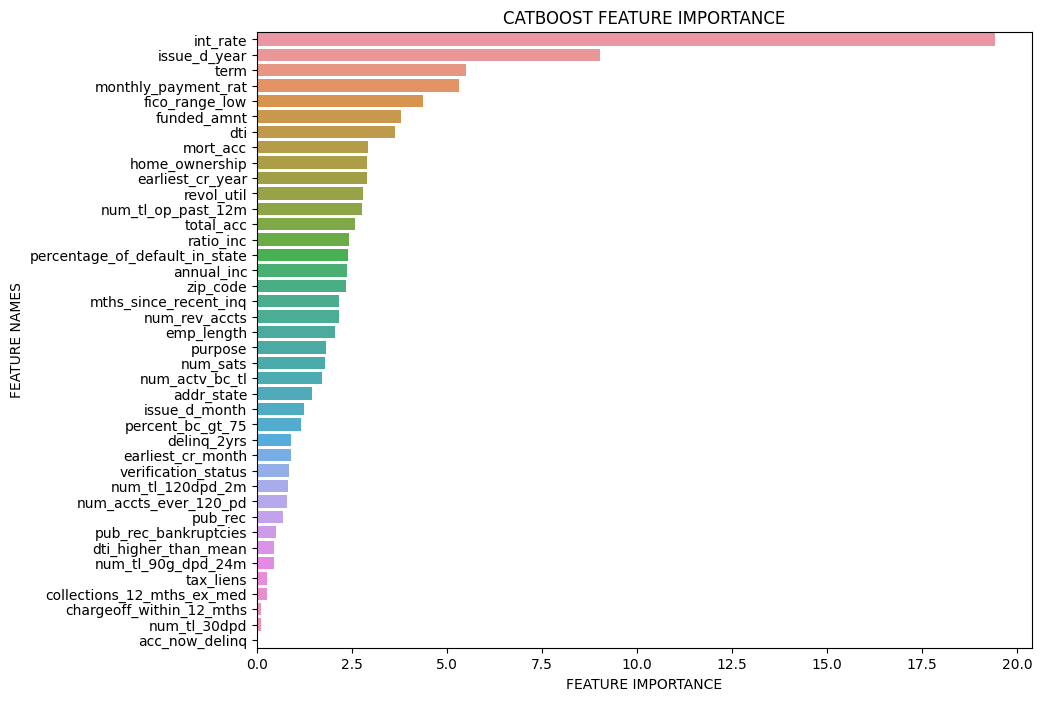

In [34]:
def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    
plot_feature_importance(cat_classifier.get_feature_importance(),X_train.columns,'CATBOOST')

Let's look at the resaults.

In [35]:
from sklearn.metrics import f1_score

preds = cat_classifier.predict(X_test)

f1_score(y_test, preds, average='weighted')

0.7668883371973301

In [36]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, preds)

0.5641450879424379

In [37]:
from sklearn.metrics import recall_score

recall_score(y_test, preds, average='weighted')

0.8093674199168118

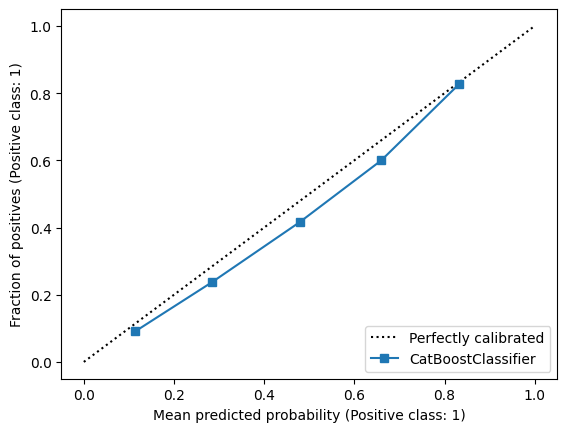

In [38]:
from sklearn.calibration import CalibrationDisplay

CalibrationDisplay.from_estimator(cat_classifier, X_test, y_test)
plt.show()

According to the task, we should maximize gini.

In [39]:
from sklearn.metrics import roc_auc_score

probabilities = cat_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
auc = roc_auc_score(y_test, probabilities)

# Calculate Gini
gini = 2 * auc - 1

print(f"ROC AUC: {auc:.4f}")
print(f"Gini: {gini:.4f}")


ROC AUC: 0.7306
Gini: 0.4611


Seems ok. Let's traing the model with the full training data and predict test

In [ ]:
cat_classifier.fit(train, train_target, cat_features=object_col_indices)